# Round 2 User Test Analysis

Created on 5/15/2021

## Data Ingestion

In [76]:
import pandas as pd
import numpy as np
import os

raw_df_dict = {}

num_participants = 0

df = pd.read_csv("round2_results.csv")
num_participants = len(df)
        
print(f"\nTotal Participants: {num_participants}")


Total Participants: 10


In [77]:
df.head()

,Timestamp,instrument,used_before,years_lessons,has_prev_chamber_exp,"If ""yes"", what kind of group was it? (ex: chamber music, jazz combo, rock band, acapella)",small_group_exp,has_done_virtual_rehearsal,"If ""yes"", was your first virtual music rehearsal before or during the pandemic?","If ""yes"", which software did you use, and how did the experience compare to JamNSync?",...,audio_in,audio_out,Comments on audio quality and overall recording experience:,not_in_person_likelihood,Explain your reasoning.,in_person_likelihood,Explain your reasoning..1,What did you think worked particularly well?,What did you find frustrating about the experience?,"Final thoughts or recommendations (i.e. for the app, user test experience, etc.)?"
0,2021/05/06 9:59:17 AM AST,ukulele,Yes,8+ years,Yes,"small orchestra ensemble, piano duets",2-4 years,No,NaN,NaN,...,wired headphones,wired,audio quality was clear but could hear clickin...,5,i would use it for rehearsing but not for prac...,1,nothing beats in the in-person experience of p...,"logging in, creating group, creating project a...",the two areas that were hardest to follow were...,just curious - what does the recording page lo...
1,2021/05/06 9:52:22 PM AST,Voice,No,8+ years,Yes,"acapella, self with self, piano accompaniment ...",8+ years,Yes,During (March 2020 - present),"Soundjack, Zoom. Soundjack was more magical, ...",...,usb mic,professional wired,Great audio quality. Permissions came up fine...,7,Audio alignment tool is a very helpful tool be...,4,I still might want to use JamNSync when people...,Audio alignment tool is genius! The buttons a...,There is little feedback for incoming updates ...,Alignment of tracks is a major pain point for ...
2,2021/05/07 12:27:11 AM AST,Guitar,No,<1 year,Yes,Band in middle school,1-2 years,No,NaN,NaN,...,built-in laptop,professional wired,"Accurate for what I expected my laptop to be, ...",6,I like how quick it is to hear everything toge...,2,You don't need to record or set up zoom/mic se...,"Recording was easy. Adding tracks, projects, m...",Where is the seeker thing!! I would like one.,"I thought it was super smooth, except when it ..."
3,2021/05/07 2:16:08 AM AST,Piano,No,<1 year,Yes,concerto type piano + strings (only 1 performa...,<1 year,No,NaN,NaN,...,built-in laptop,professional wired,"Audio quality was bad, with loud and soft spot...",7,Don't know any alternatives. Easy to set up an...,3,Maybe in between in-person practices. Likely w...,Easy to set up and get started. No noticeable ...,"Sound quality, but I don't expect the best fro...",Group buttons need feedback for the 2nd person...
4,2021/05/07 11:02:28 AM AST,Voice,No,8+ years,Yes,Jazz Combo,4-8 years,Yes,During (March 2020 - present),Jazz band tried to use sound jack/zoom to rehe...,...,usb mic,professional wired,The audio quality was fine when I downloaded t...,5,I think this is a nice tool to rehearse and it...,2,Playing with people in person just can't be be...,I think in general the whole system was pretty...,There's no way to see where in the song you ar...,The biggest thing that would stop me from usin...


## Data Clean Up

In [60]:
# isolate non-feedback columns
target_cols = ['instrument', 'used_before', 'years_lessons', 'has_prev_chamber_exp', 'small_group_exp', 'has_done_virtual_rehearsal', 'recording_exp', 'daw_exp', 'audio_in', 'audio_out', 'nav_rating', 'setup_rating', 'groupfeat_rating', 'aligntool_rating', 'audioquality_rating', 'not_in_person_likelihood', 'in_person_likelihood']
numerical_cols = ['recording_exp', 'daw_exp', 'nav_rating', 'setup_rating', 'groupfeat_rating', 'aligntool_rating','audioquality_rating', 'not_in_person_likelihood', 'in_person_likelihood']
filtered_df = df[target_cols]

# make all test lowercase
filtered_df.apply(lambda x: x.astype(str).str.lower())

,instrument,used_before,years_lessons,has_prev_chamber_exp,small_group_exp,has_done_virtual_rehearsal,recording_exp,daw_exp,audio_in,audio_out,nav_rating,setup_rating,groupfeat_rating,aligntool_rating,audioquality_rating,not_in_person_likelihood,in_person_likelihood
0,ukulele,yes,8+ years,yes,2-4 years,no,2,2,wired headphones,wired,7,6,6,3,4,5,1
1,voice,no,8+ years,yes,8+ years,yes,6,7,usb mic,professional wired,6,6,6,4,7,7,4
2,guitar,no,<1 year,yes,1-2 years,no,6,6,built-in laptop,professional wired,7,7,6,6,5,6,2
3,piano,no,<1 year,yes,<1 year,no,2,3,built-in laptop,professional wired,6,6,5,7,3,7,3
4,voice,no,8+ years,yes,4-8 years,yes,6,6,usb mic,professional wired,7,7,6,5,7,5,2
5,voice,no,8+ years,yes,4-8 years,yes,6,6,usb mic,professional wired,5,5,5,4,5,4,1
6,piano,yes,8+ years,yes,2-4 years,yes,4,4,airpods,airpods,7,7,5,7,6,6,3
7,cello,yes,8+ years,yes,8+ years,yes,2,3,airpods,airpods,7,6,3,6,1,3,1
8,clarinet,no,4-8 years,yes,1-2 years,yes,4,4,built-in laptop,professional wired,3,5,5,6,3,5,1
9,clarinet,no,4-8 years,yes,2-4 years,yes,4,4,built-in laptop,professional wired,7,7,6,7,5,6,5


In [61]:
filtered_df

,instrument,used_before,years_lessons,has_prev_chamber_exp,small_group_exp,has_done_virtual_rehearsal,recording_exp,daw_exp,audio_in,audio_out,nav_rating,setup_rating,groupfeat_rating,aligntool_rating,audioquality_rating,not_in_person_likelihood,in_person_likelihood
0,ukulele,Yes,8+ years,Yes,2-4 years,No,2,2,wired headphones,wired,7,6,6,3,4,5,1
1,Voice,No,8+ years,Yes,8+ years,Yes,6,7,usb mic,professional wired,6,6,6,4,7,7,4
2,Guitar,No,<1 year,Yes,1-2 years,No,6,6,built-in laptop,professional wired,7,7,6,6,5,6,2
3,Piano,No,<1 year,Yes,<1 year,No,2,3,built-in laptop,professional wired,6,6,5,7,3,7,3
4,Voice,No,8+ years,Yes,4-8 years,Yes,6,6,usb mic,professional wired,7,7,6,5,7,5,2
5,Voice,No,8+ years,Yes,4-8 years,Yes,6,6,usb mic,professional wired,5,5,5,4,5,4,1
6,Piano,Yes,8+ years,Yes,2-4 years,Yes,4,4,airpods,airpods,7,7,5,7,6,6,3
7,Cello,Yes,8+ years,Yes,8+ years,Yes,2,3,airpods,airpods,7,6,3,6,1,3,1
8,Clarinet,No,4-8 years,Yes,1-2 years,Yes,4,4,built-in laptop,professional wired,3,5,5,6,3,5,1
9,Clarinet,No,4-8 years,Yes,2-4 years,Yes,4,4,built-in laptop,professional wired,7,7,6,7,5,6,5


## Data Processing

In [48]:
filtered_df.describe()

,recording_exp,daw_exp,nav_rating,setup_rating,groupfeat_rating,aligntool_rating,audioquality_rating,not_in_person_likelihood,in_person_likelihood
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.20000,4.500000,6.200000,6.200000,5.300000,5.500000,4.600000,5.400000,2.300000
std,1.75119,1.649916,1.316561,0.788811,0.948683,1.433721,1.897367,1.264911,1.418136
min,2.00000,2.000000,3.000000,5.000000,3.000000,3.000000,1.000000,3.000000,1.000000
25%,2.50000,3.250000,6.000000,6.000000,5.000000,4.250000,3.250000,5.000000,1.000000
50%,4.00000,4.000000,7.000000,6.000000,5.500000,6.000000,5.000000,5.500000,2.000000
75%,6.00000,6.000000,7.000000,7.000000,6.000000,6.750000,5.750000,6.000000,3.000000
max,6.00000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,5.000000


In [49]:
# count up nubmer of ooccurences of each item in the column
for col in target_cols:
    print("-------–--–--–--–--–--–--–--–")
    print(filtered_df[col].value_counts())
    print()

-------–--–--–--–--–--–--–--–
Voice       3
Piano       2
Clarinet    2
ukulele     1
Guitar      1
Cello       1
Name: instrument, dtype: int64

-------–--–--–--–--–--–--–--–
No     7
Yes    3
Name: used_before, dtype: int64

-------–--–--–--–--–--–--–--–
8+ years     6
<1 year      2
4-8 years    2
Name: years_lessons, dtype: int64

-------–--–--–--–--–--–--–--–
Yes    10
Name: has_prev_chamber_exp, dtype: int64

-------–--–--–--–--–--–--–--–
2-4 years    3
8+ years     2
1-2 years    2
4-8 years    2
<1 year      1
Name: small_group_exp, dtype: int64

-------–--–--–--–--–--–--–--–
Yes    7
No     3
Name: has_done_virtual_rehearsal, dtype: int64

-------–--–--–--–--–--–--–--–
6    4
2    3
4    3
Name: recording_exp, dtype: int64

-------–--–--–--–--–--–--–--–
4    3
6    3
3    2
2    1
7    1
Name: daw_exp, dtype: int64

-------–--–--–--–--–--–--–--–
built-in laptop     4
usb mic             3
airpods             2
wired headphones    1
Name: audio_in, dtype: int64

-------–--–--–-

## Results

In [50]:
# Packages
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [81]:
def plot_helper(x, y):
    plt.scatter(x, y)
    b, m = polyfit(x, y, 1)
    plt.plot(x, b + m * x, '-')
    print(r_squared(y, b+m*x))
    plt.show()

In [82]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)


***********************
RECORDING_EXP
***********************
recording_exp vs. daw_exp
0.9242827565808932


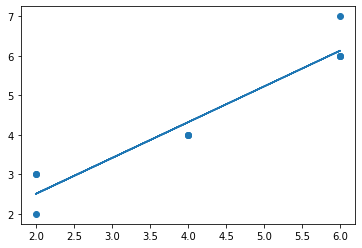

recording_exp vs. nav_rating
0.013377926421404562


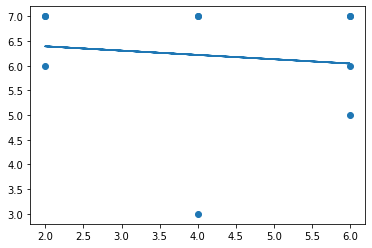

recording_exp vs. setup_rating
0.0165631469979296


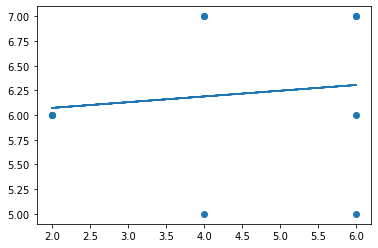

recording_exp vs. groupfeat_rating
0.24494542852030765


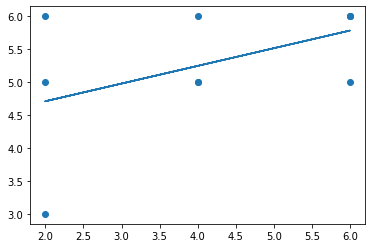

recording_exp vs. aligntool_rating
0.04896200548374474


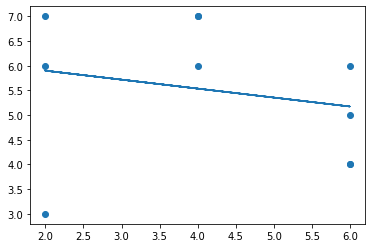

recording_exp vs. audioquality_rating
0.5813204508856682


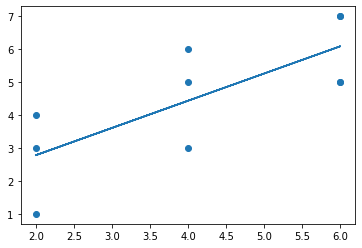

recording_exp vs. not_in_person_likelihood
0.025764895330112614


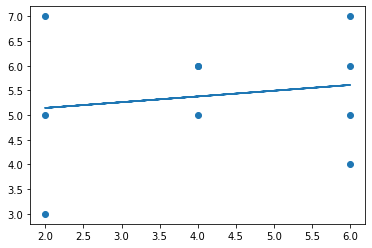

recording_exp vs. in_person_likelihood
0.02314036351989779


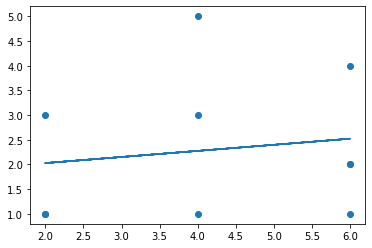


***********************
DAW_EXP
***********************
daw_exp vs. recording_exp
0.9242827565808932


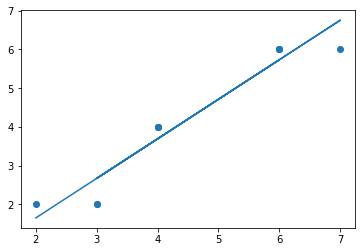

daw_exp vs. nav_rating
0.010465724751439254


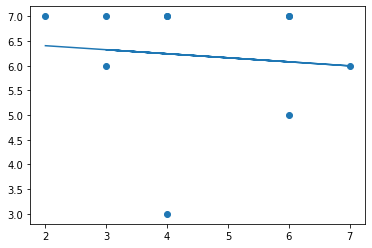

daw_exp vs. setup_rating
0.007288629737609242


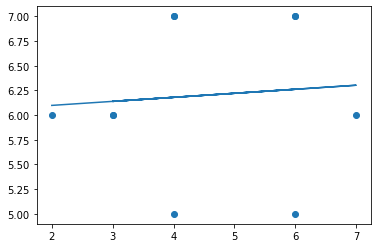

daw_exp vs. groupfeat_rating
0.15243134290753302


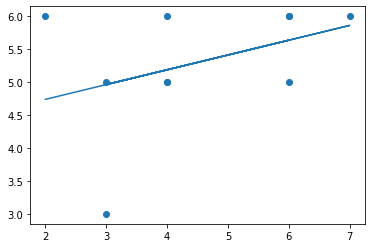

daw_exp vs. aligntool_rating
0.044677330391616366


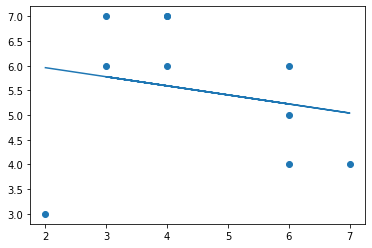

daw_exp vs. audioquality_rating
0.5039052658100276


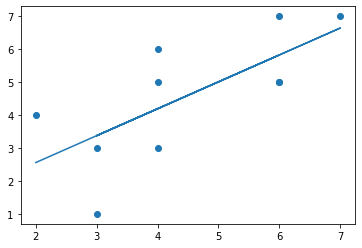

daw_exp vs. not_in_person_likelihood
0.045351473922902286


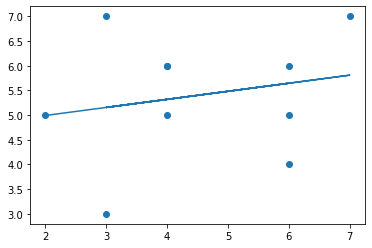

daw_exp vs. in_person_likelihood
0.04566467470966307


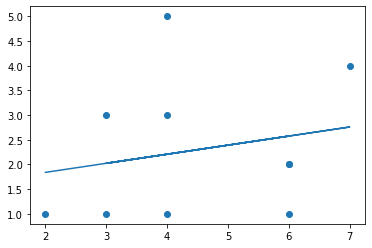


***********************
NAV_RATING
***********************
nav_rating vs. recording_exp
0.013377926421404562


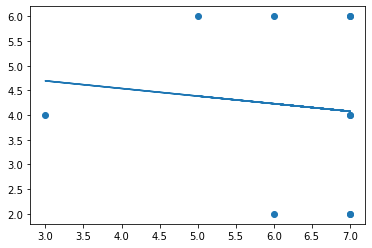

nav_rating vs. daw_exp
0.010465724751439032


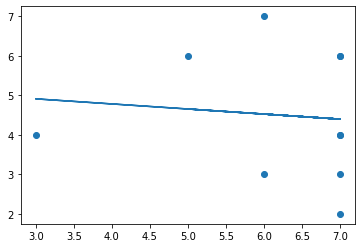

nav_rating vs. setup_rating
0.6611721611721613


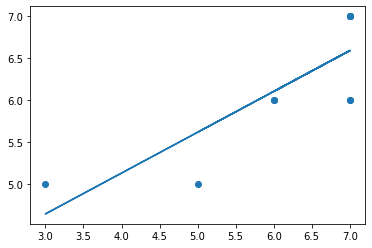

nav_rating vs. groupfeat_rating
0.01551123773345997


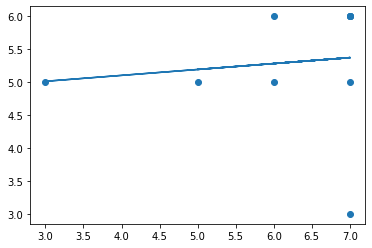

nav_rating vs. aligntool_rating
0.0034650034650033357


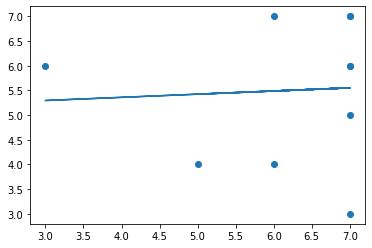

nav_rating vs. audioquality_rating
0.045584045584045496


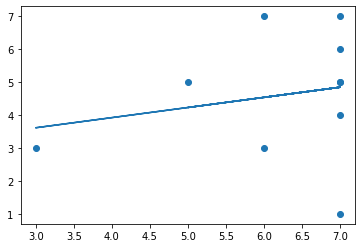

nav_rating vs. not_in_person_likelihood
0.0064102564102564985


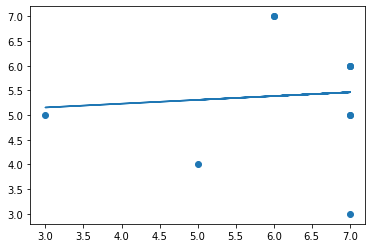

nav_rating vs. in_person_likelihood
0.10327241818954513


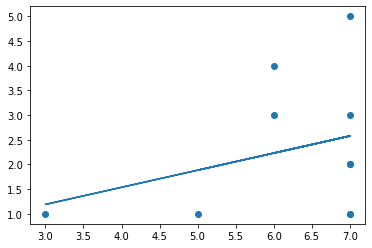


***********************
SETUP_RATING
***********************
setup_rating vs. recording_exp
0.0165631469979296


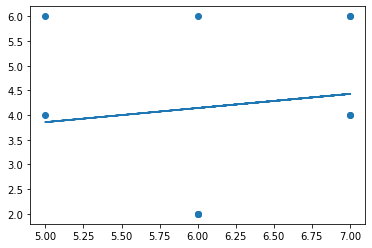

setup_rating vs. daw_exp
0.007288629737609464


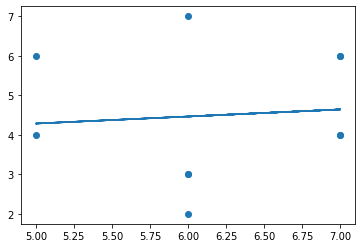

setup_rating vs. nav_rating
0.6611721611721615


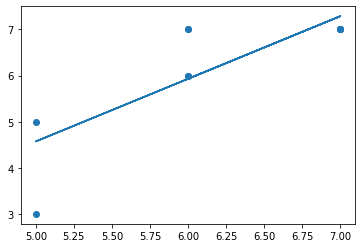

setup_rating vs. groupfeat_rating
0.1269841269841271


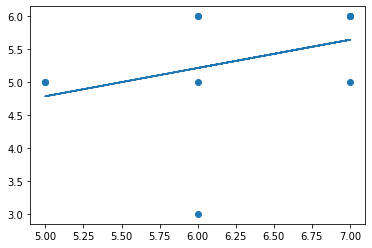

setup_rating vs. aligntool_rating
0.15444015444015446


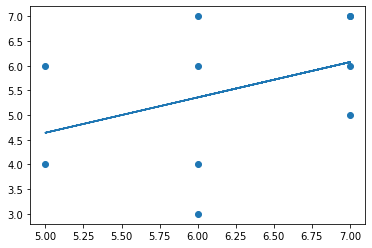

setup_rating vs. audioquality_rating
0.18540564373897717


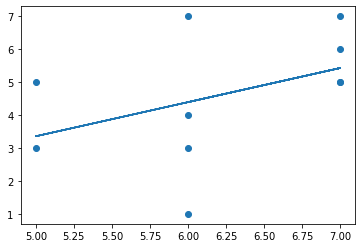

setup_rating vs. not_in_person_likelihood
0.12698412698412687


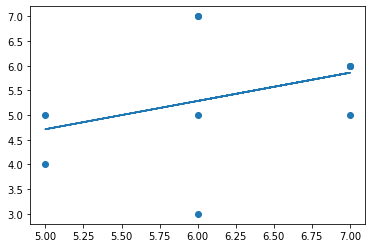

setup_rating vs. in_person_likelihood
0.2876874506708762


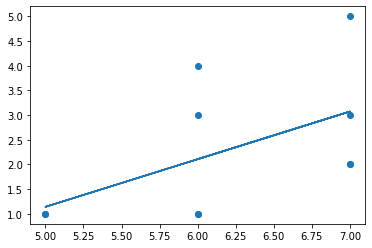


***********************
GROUPFEAT_RATING
***********************
groupfeat_rating vs. recording_exp
0.24494542852030765


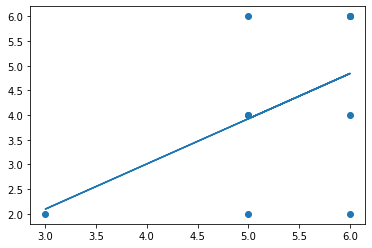

groupfeat_rating vs. daw_exp
0.15243134290753335


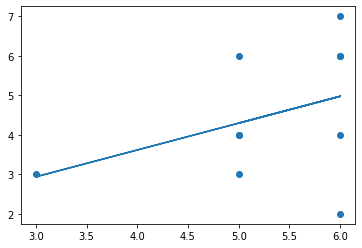

groupfeat_rating vs. nav_rating
0.015511237733460304


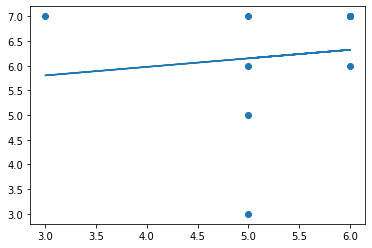

groupfeat_rating vs. setup_rating
0.12698412698412698


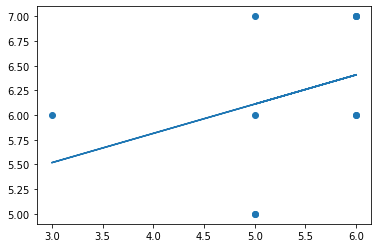

groupfeat_rating vs. aligntool_rating
0.08174841508174835


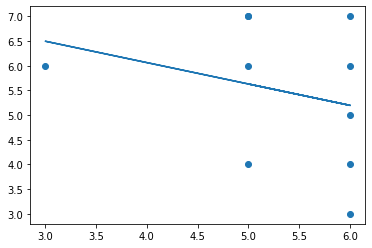

groupfeat_rating vs. audioquality_rating
0.5671391556165218


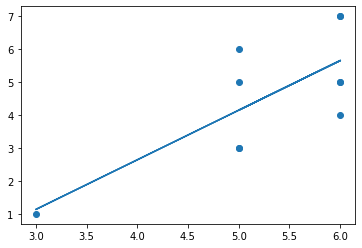

groupfeat_rating vs. not_in_person_likelihood
0.3964334705075445


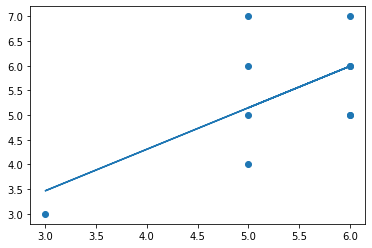

groupfeat_rating vs. in_person_likelihood
0.17740945365254757


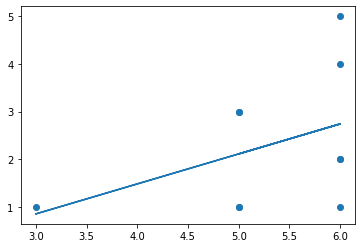


***********************
ALIGNTOOL_RATING
***********************
aligntool_rating vs. recording_exp
0.04896200548374474


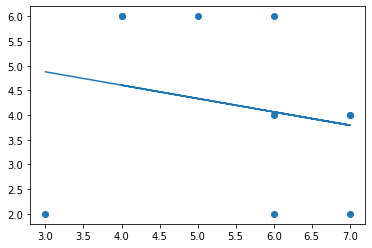

aligntool_rating vs. daw_exp
0.04467733039161603


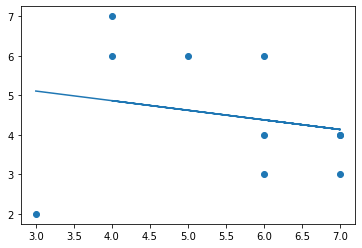

aligntool_rating vs. nav_rating
0.0034650034650035577


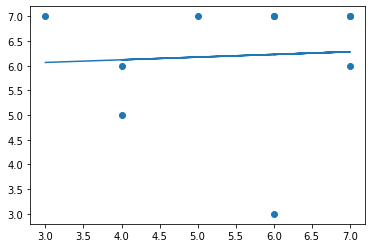

aligntool_rating vs. setup_rating
0.15444015444015413


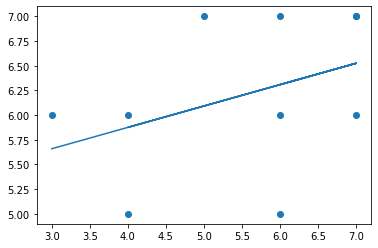

aligntool_rating vs. groupfeat_rating
0.08174841508174824


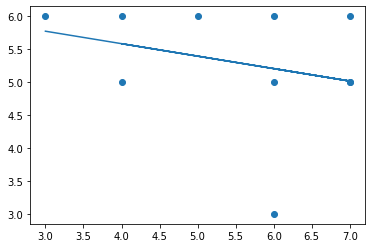

aligntool_rating vs. audioquality_rating
0.06006006006006037


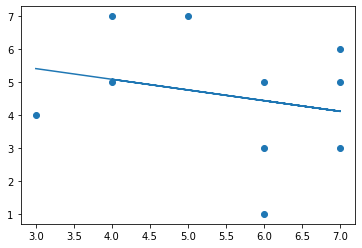

aligntool_rating vs. not_in_person_likelihood
0.06006006006006004


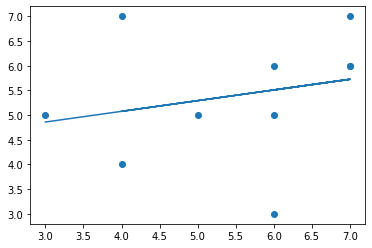

aligntool_rating vs. in_person_likelihood
0.16798566522323422


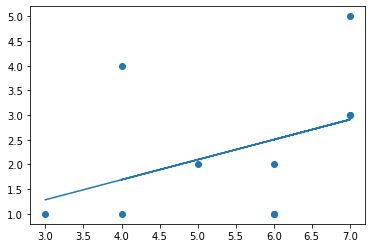


***********************
AUDIOQUALITY_RATING
***********************
audioquality_rating vs. recording_exp
0.5813204508856682


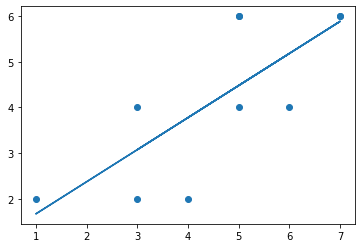

audioquality_rating vs. daw_exp
0.5039052658100278


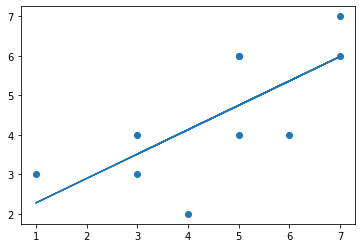

audioquality_rating vs. nav_rating
0.04558404558404572


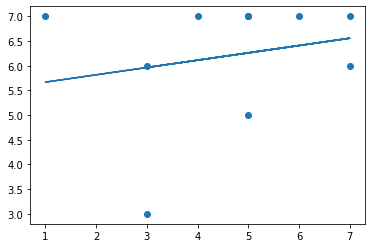

audioquality_rating vs. setup_rating
0.18540564373897717


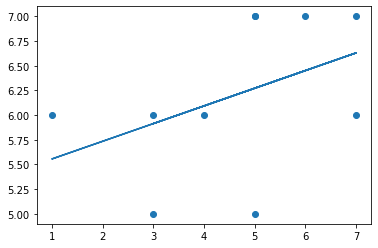

audioquality_rating vs. groupfeat_rating
0.5671391556165217


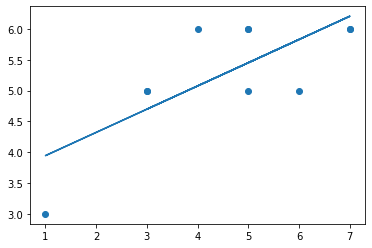

audioquality_rating vs. aligntool_rating
0.06006006006006004


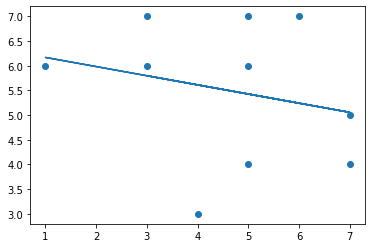

audioquality_rating vs. not_in_person_likelihood
0.24082647462277074


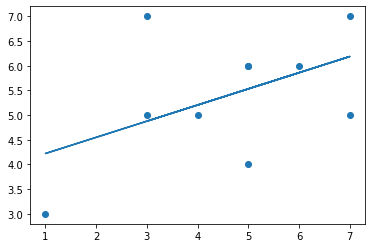

audioquality_rating vs. in_person_likelihood
0.21390082531887322


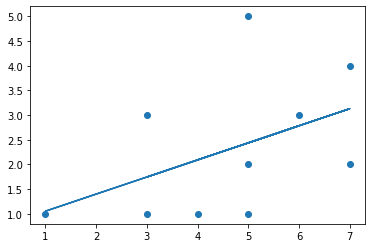

In [83]:
def test_numerical_cols():
    for c1 in numerical_cols:
        if c1 in ['in_person_likelihood', 'not_in_person_likelihood']:
            continue
        print("\n***********************")
        print(c1.upper())
        print("***********************")
        for c2 in numerical_cols:
            if c1 == c2:
                continue
            print(f"{c1} vs. {c2}")
            plot_helper(filtered_df[c1], filtered_df[c2])
test_numerical_cols()

### Likelihood Could vs. Could Not Rehearse

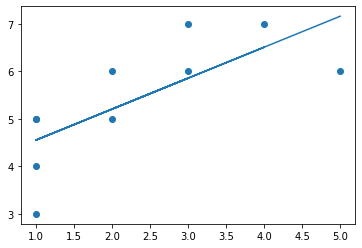

In [75]:
plot_helper(filtered_df.in_person_likelihood, filtered_df.not_in_person_likelihood)

### Bar Graphs

<AxesSubplot:>

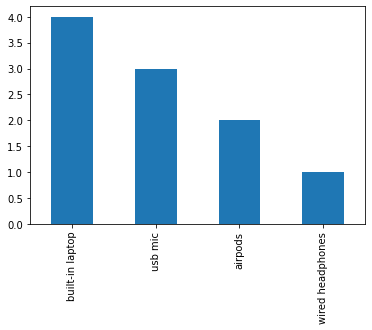

In [73]:
filtered_df['audio_in'].value_counts().plot.bar()

<AxesSubplot:>

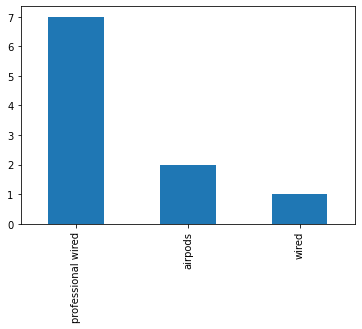

In [74]:
filtered_df['audio_out'].value_counts().plot.bar()